### Part 1 - Numpy image processing

In this part of the exercise you will experiment with image processing in numpy. Do not use additional imports. You can install `skimage` using the following command: `pip3 install -U scikit-image` or `conda install -c anaconda scikit-image` And matplotlib using `pip3 install -U matplotlib` or `conda install -c conda-forge matplotlib`

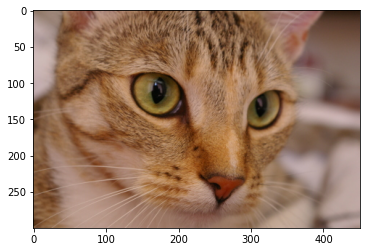

In [237]:
# Make sure this cell runs without errors.
import numpy as np
from skimage import data
from IPython.display import Image
import matplotlib.pyplot as plt

image = data.chelsea()
plt.imshow(image)

Implement the following functions (and see desired outputs and further explanations below):

1. Reduce the size of the image by a factor of 2.
1. Mirror the image horizontally.
1. Mirror the image vertically.
1. Pass a mean filter (kernel) on the image: when writing this function, think what your kernel size should be, and howmany windows (of the kernel size) you have. Use loops and figure out how each window should be accessed and what operations you need to perform on each window. Note that the image has 3 dimensions: x, y, and [r,g,b]. **This step should be implemented using no more than two loops.**

Some explanation on 4: A mean filter is used to blur an image in order to remove noise. It involves using a k x k matrix called a kernel, and applying the kernel to each k x k square in the image. Applying the kernel to a k x k square in the image results in replacing the center pixel value with the average value of the k x k square surrounding it. This process is done over the entire image where possible. So, you need to choose the dimensions of the kernel (which is a square matrix) and choose the values in the kernel that will yield the desired result.  

For example: 

If image = $\begin{bmatrix} 7 & 4 & 0 & 1 \\ 5 & 6 & 2 & 2 \\ 6 & 10 & 7 & 8 \\ 1 & 4 & 2 & 0 \end{bmatrix}$   

and kernel = `np.ones((3,3)) * 1/9`

then blurred_image = $\begin{bmatrix} 5 & 4 \\ 4 & 4 \end{bmatrix}$

However, note that the above example uses single integer values per pixel, whereas we use [r,g,b] values (where r, g, and b each get an integer from 0 to 255).

You are free to add additional cells and define as many functions as you need. Remember to think before writing a loop - there might be a `numpy` trick that does the same. **Make sure you don't change the original image while you process it.**

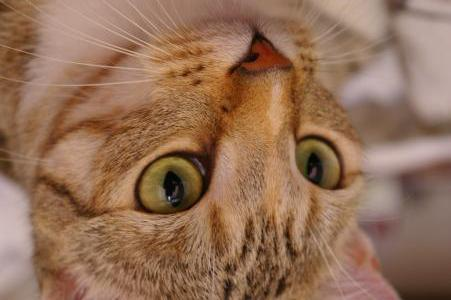

In [4]:
Image('flip.jpg')

In [234]:
def reduce_size(image):
    image_copy = None
    ########## Your code starts here ##########
    image_copy = image[::2, ::2, :]
    ##########  Your code ends here  ##########
    return image_copy

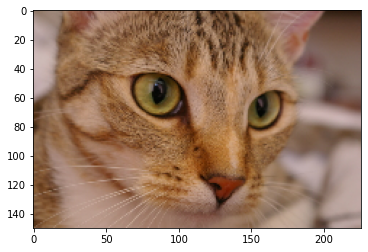

In [236]:
# use this to check your results
reduced_image = reduce_size(image)
plt.imshow(reduced_image) 

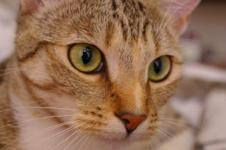

In [ ]:
Image("reduced.jpg")

In [239]:
def mirror_horizontally(image):
    image_copy = None
    ########## Your code starts here ##########
    image_copy = image[:, ::-1, :]
    ##########  Your code ends here  ##########
    return image_copy

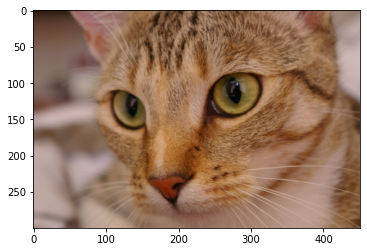

In [240]:
# use this to check your results
mirror = mirror_horizontally(image)
plt.imshow(mirror) 

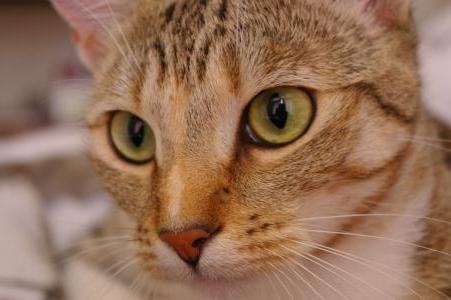

In [40]:
Image("mirror.jpg")

In [230]:
def convolve(image, kernel=3):
    image_copy = None
    ########## Your code starts here ##########
    image_copy = image.copy()
    ker = np.ones((kernel, kernel, 3)) / kernel ** 2
    
    res = []
    rows, cols, pix = image_copy.shape
    for i in range(rows - (kernel-1) ):
        r = []
        for j in range(cols - (kernel-1)):
            mat = image_copy[i:i+kernel, j:j+kernel]
            r.append((mat*ker).sum(axis=1).sum(axis=0))
        res.append(r)
    return np.array(res, dtype=int)
    ##########  Your code ends here  ##########
    return image_copy

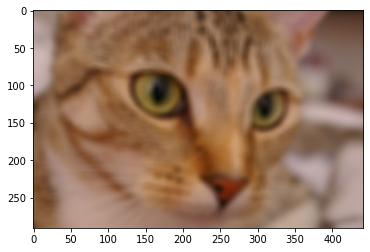

In [233]:
# use this to check your results
convolve_image = convolve(image, 10)
plt.imshow(convolve_image) 

## Part 2

Given an array `X` of points in some n-dimensional space, and an additional, smaller array of points `C` (centers) in the same space, return an array `A` such that if `A[i]=j` then the i'th point is closest to the j'th center. For example: 

In [14]:
import numpy as np

In [140]:
X = np.array([[1,2],
              [4,4],
              [5,3],
              [3,3],
              [1,6],
              [0,1]])

C = np.array([[1,1],
              [2,3]])

A = np.array([0, 1, 1, 1, 1, 0])

array([[ 1,  1,  2,  8],
       [ 5, 10,  1,  4],
       [ 1,  6,  7,  9]])

In [247]:
X = np.random.randint(0, 11, size=(20, 4))
C = np.random.randint(0, 11, size=(3, 4))

You should use Euclidean distance (however you are encouraged to experiment with different distance metrics). You will encounter this functionality once you learn about the clustering algorithm known as [k-means](https://en.wikipedia.org/wiki/K-means_clustering). The following [YouTube video](https://www.youtube.com/watch?v=EEUXKG97YRw) might also help. Add as many functions and cells as you need.

In [248]:
########## Your code starts here ##########
Y = np.expand_dims(C, axis=1)
D = ((X - Y)**2).sum(axis=2)
np.sqrt(D).argmin(axis=0)
##########  Your code ends here  ##########

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 0, 2, 1, 2, 1],
      dtype=int64)

Let us test the above code:

In [249]:
from sklearn.neighbors import NearestNeighbors
d, i = NearestNeighbors().fit(C).kneighbors(X, 2)
i[:, 0]

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 2, 1, 2, 0, 2, 1, 2, 1],
      dtype=int64)

The End :)